# Heart Disease UCI - Machine Learning Project
Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Context
### The database contains 14 attributes from 303 patients. The goal is to create a model to predict heart disease based on the attributes below: 
 1. age
 2. sex (female = 0, male =1) 
 3. chest pain type (no pain = 0, typical angina = 1, atypical angina = 2, non-anginal pain = 3, asymptomatic = 4) 
 4. resting blood pressure 
 5. serum cholestoral in mg/dl 
 6. fasting blood sugar > 120 mg/dl (True = 1, False = 0)
 7. resting electrocardiographic results (normal = 0, having ST-T wave abnormality = 1, showing probable or definite left ventricular hypertrophy =2)
 8. maximum heart rate achieved 
 9. exercise induced angina (positive = 1, negative = 0)
 10. oldpeak = ST depression induced by exercise relative to rest 
 11. the slope of the peak exercise ST segment (upsloping = 0, flat = 1, downsloping = 2)
 12. number of major vessels (0-3) colored by flourosopy 
 13. thal (no thalassemia = 0, normal = 1, fixed defect = 2,  reversible defect = 3)
 
#### The last column is binary for heart disease (negative = 0, positive = 1)

### Importing data/libraries and data cleanup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
np.random.seed(0)

%matplotlib inline
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
#import file and create dataframe
heart_df =  pd.read_csv('heart.csv')

#rename columns
heart_columns = ['age','sex','chest_pain_type','resting_bps','cholestoral','fasting_blood_sugar',
                 'resting_ecg','max_hr','exercise_angina','old_peak','slope_peak','num_major_vessels',
                 'thalassemia','target']
heart_df.columns = heart_columns

#EDA
heart_df.info() #no-null records, that's beautiful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain_type        303 non-null int64
resting_bps            303 non-null int64
cholestoral            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_hr                 303 non-null int64
exercise_angina        303 non-null int64
old_peak               303 non-null float64
slope_peak             303 non-null int64
num_major_vessels      303 non-null int64
thalassemia            303 non-null int64
target                 303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
#assigning categories for values
heart_df.sex[heart_df.sex == 0] = 'female'
heart_df.sex[heart_df.sex == 1] = 'male'

heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 0] = 'no_pain'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 1] = 'typical_angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 2] = 'atypical_angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 3] = 'non_anginal_pain'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 4] = 'asymptomatic'

heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 0] = 'less_than_120'
heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 1] = 'greater_than_120'

heart_df['resting_ecg'][heart_df['resting_ecg'] == 0] = 'normal'
heart_df['resting_ecg'][heart_df['resting_ecg'] == 1] = 'wave_abnormality'
heart_df['resting_ecg'][heart_df['resting_ecg'] == 2] = 'left_vent_hypertrophy'

heart_df['exercise_angina'][heart_df['exercise_angina'] == 0] = 'negative'
heart_df['exercise_angina'][heart_df['exercise_angina'] == 1] = 'positive'

heart_df['slope_peak'][heart_df['slope_peak'] == 0] = 'upsloping'
heart_df['slope_peak'][heart_df['slope_peak'] == 1] = 'flat'
heart_df['slope_peak'][heart_df['slope_peak'] == 2] = 'downsloping'

heart_df['thalassemia'][heart_df['thalassemia'] == 0] = 'no_thalassemia'
heart_df['thalassemia'][heart_df['thalassemia'] == 1] = 'normal'
heart_df['thalassemia'][heart_df['thalassemia'] == 2] = 'fixed_defect'
heart_df['thalassemia'][heart_df['thalassemia'] == 3] = 'reversible_defect'

#make sure I'm not missing any values
list_columns = list(heart_df.columns)

for column in list_columns:
    print(column)
    print(heart_df[column].unique())

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
['male' 'female']
chest_pain_type
['non_anginal_pain' 'atypical_angina' 'typical_angina' 'no_pain']
resting_bps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholestoral
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 32

The dataframe looks good, columns have been renamed and null values don't exist! Great!

Next step is to create columns for each category, this is necessary to better fit the data to the model. With pd.get_dummies, pandas will create binary columns for categorical values.

In [4]:
#create dummies
heart_df = pd.get_dummies(heart_df, drop_first=True)
heart_df.head()

,age,resting_bps,cholestoral,max_hr,old_peak,num_major_vessels,target,sex_male,chest_pain_type_no_pain,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,fasting_blood_sugar_less_than_120,resting_ecg_normal,resting_ecg_wave_abnormality,exercise_angina_positive,slope_peak_flat,slope_peak_upsloping,thalassemia_no_thalassemia,thalassemia_normal,thalassemia_reversible_defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0
4,57,120,354,163,0.6,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0


## Model Building
First, the data will be splitted into train and test, then I'm going straight to the model.

In [5]:
from sklearn.model_selection import train_test_split

#Defining target (y) and variables (X)
y = heart_df.target
X = heart_df.drop('target', axis=1)

#Define my train and test dataframes/series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Nearest Neigbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import roc_curve, auc 
from math import sqrt

### Model Tuning:
Before fitting the model to the test data, I'll try to figure out the optimal value of neighbors. For that, a loop was created and results were plotted.

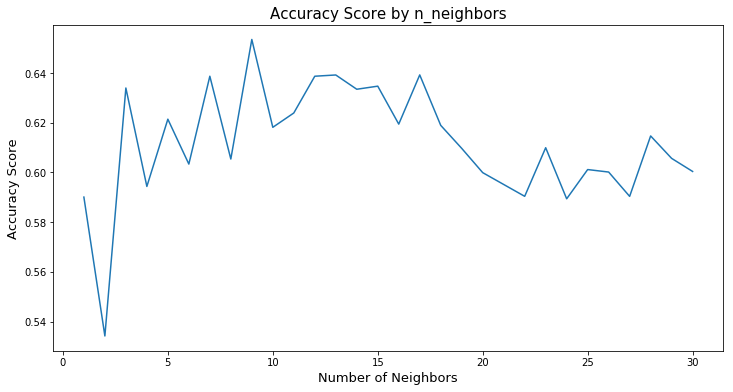

In [7]:
#Two lists: One for number of neighbors and the other to store accuracy values
n_numbers = []
k_scores = []

#Parameter Optimization
for n in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=n) #n_neighbors will change every loop
    knn.fit(X_train,y_train) #model will be trained
    scores = cross_val_score(knn, X_train, y_train, cv=10) #accuracy will be calculated
    k_scores.append(scores.mean())
    n_numbers.append(n)

#plot lists
plt.figure(figsize=(12,6))
plt.plot(n_numbers,k_scores)
plt.title('Accuracy Score by n_neighbors', fontsize = 15)
plt.xlabel('Number of Neighbors', fontsize = 13)
plt.ylabel('Accuracy Score', fontsize = 13);

In [8]:
#Store the optimal number of neighbors in optimal_n
optimal_n = k_scores.index(max(k_scores))

#Define knn with optimal n
knn = KNeighborsClassifier(n_neighbors=optimal_n)

#train the model and predict y using the test data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

After creating the model, optimizing it and predicting the targets using the test data.
It's time to evaluate the model using different metrics.

In [9]:
#check accuracy of y_test vs y_pred
print('Accuracy Score: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('Confusion Matrix:') 
print(confusion_matrix(y_test, y_pred))
print('Mean Absolute Error (MAE): ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error (MSE): ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error (RMSE): ' + str(sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2- Squared: ' + str(metrics.r2_score(y_test, y_pred)))

Accuracy Score: 0.68
Confusion Matrix:
[[28 14]
 [18 40]]
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.565685424949238
R2- Squared: -0.3136288998357961


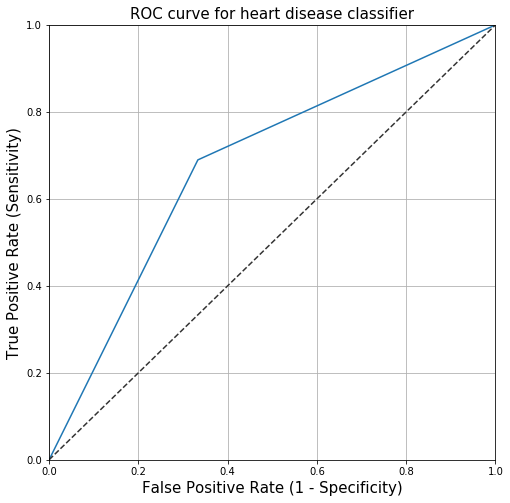

In [10]:
#We can also create the Receiver Operator Curve.
#The closest the blue line is to the left upside of the chart the better the model is.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls="--", c=".2")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart disease classifier', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.grid(True)

Another great performance metric is the Area Under the Curve. As a rule of thumb, an AUC can be classed as follows:

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

Let's see what get from the model

In [11]:
auc(fpr, tpr)

0.67816091954023

That's not good enough for, we could keep trying to change the hyperparameters, but I think we need a better algorithm to predict heart disease.

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import eli5
from eli5.sklearn import PermutationImportance

### Model Tuning:
This time, instead of running a loop, I'm going ot use the Randomized Search CV, which is a cross validation tool that in contrast to GridSearchCV, doesn't try all parameter values, but rather a fixed number of parameter settings is sampled from the specified distributions.
The benefit of this tool is to avoid overtfitting and its runtime is lower.

In [13]:
#Random Forest
rf = RandomForestClassifier()

#Optimize parameters using RandomizedSerchCV
#Number of trees in random forest
n_estimators = list(range(10,101,10))
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#Use the random grid to search for best hyperparameters
#Random search of parameters, using 5 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, random_state=42, n_jobs = -1)
#Fit the random search model
rf_random.fit(X_train, y_train)
#Predict y_test using X_test
y_pred = rf_random.predict(X_test)

/Users/reno/anaconda2/envs/py365/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/reno/anaconda2/envs/py365/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Model Evaluation:

In [14]:
#check accuracy of y_test vs y_pred
print('Accuracy Score: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('Confusion Matrix:') 
print(confusion_matrix(y_test, y_pred))
print('Mean Absolute Error (MAE): ' + str(metrics.mean_absolute_error(y_test, y_pred))) #Mean Absolute Error (MAE)
print('Mean Squared Error (MSE): ' + str(metrics.mean_squared_error(y_test, y_pred))) #Mean Squared Error (MSE)
print('Root Mean Squared Error (RMSE): ' + str(sqrt(metrics.mean_squared_error(y_test, y_pred)))) #Root Mean Squared Error (RMSE)
print('R2- Squared: ' + str(metrics.r2_score(y_test, y_pred)))

Accuracy Score: 0.83
Confusion Matrix:
[[33  9]
 [ 8 50]]
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41231056256176607
R2- Squared: 0.30213464696223336


### ROC chart:

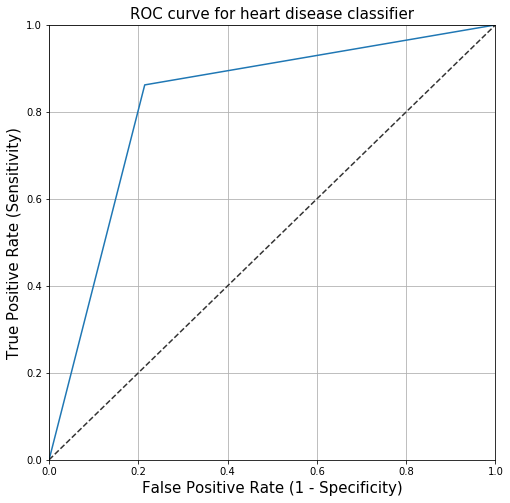

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls="--", c=".2")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart disease classifier', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.grid(True)

AUC:

In [16]:
auc(fpr, tpr)

0.8238916256157635

The conclusion is that our Random Tree model performes better than the Nearest Neighbor and this is the model I'll be using for the analysis part of the project.

### Analysis:
Now it's time for further analysis of the model and try to understand how features impact target.

For that, first I'm going to run a Permutation Importance on the model, which involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. 

In [17]:
perm = PermutationImportance(rf_random, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0420 ± 0.0265,chest_pain_type_no_pain
0.0320 ± 0.0233,thalassemia_reversible_defect
0.0140 ± 0.0325,old_peak
0.0140 ± 0.0515,num_major_vessels
0.0080 ± 0.0080,cholestoral
0.0080 ± 0.0150,max_hr
0.0060 ± 0.0160,slope_peak_flat
0 ± 0.0000,chest_pain_type_non_anginal_pain
0 ± 0.0000,sex_male
0 ± 0.0000,chest_pain_type_typical_angina


As we can see above, the following features have high weight on the accuracy of the model:

   - Thalassemia Reversible Defect
   - Number of Major Vessels
   - No Chest Pain
   - Depression induced by exercise relative to rest (old_peak)
   - Positive for Angina after Exercise


With the top 5 features in hands we can dive deeper into them and try to understand how they actually impact the outcome. For this analysis, Partial Dependence Plot will be used to see the marginal effect of a given predictor.

Partial Dependence Plot does that by plotting out the average model outcome in terms of different values of the predictor. For example, this is what would happen on the analysis of A1:
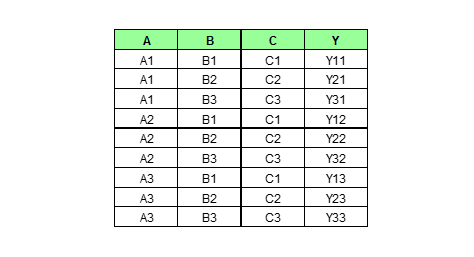
As you can see, the values of A1 are being duplicated accross all possible combinations of the other features, then the average outcome is calculated. For more information, please [click here](https://towardsdatascience.com/introducing-pdpbox-2aa820afd312).

In [19]:
from pdpbox import pdp, info_plots

#### Feature analyzed: Depression induced by exercise relative to rest (old_peak)

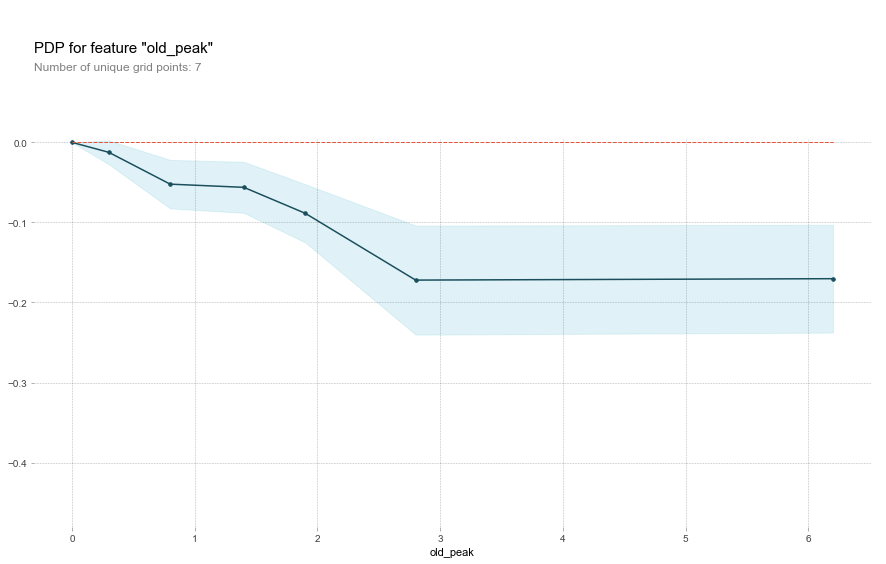

In [41]:
#put all model features in a list.
base_features = heart_df.columns.values.tolist()
base_features.remove('target')

#features we're trying to analyze
feat_name = 'old_peak'

#pdp_isolate to see the isolated impact of the features.
pdp_dist = pdp.pdp_isolate(model=rf_random, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

It's interesting to see that the model is telling us that with a higher value you have less probability of having heart disease, which doesn't make sense to me. I'd expect to see the opposite. Now I'm wondering if my samples are skewed or if this is not the best way to analyze this feature.

Let's go back to the original dataframe a plot old_peak vs target:

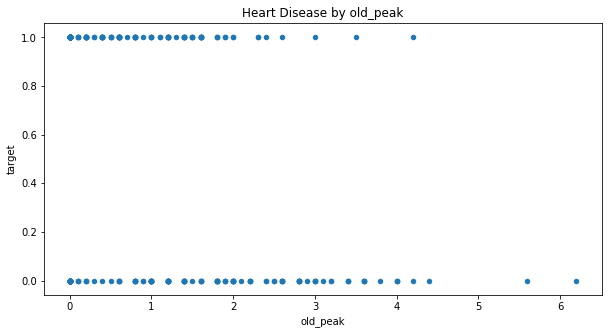

In [51]:
heart_df[['target', 'old_peak']].plot(kind='scatter', x = 'old_peak', y = 'target', 
                                      title = 'Heart Disease by old_peak', figsize=(10,5));

I don't see a pattern here and actually the model makes sense based on the chart above, I see more zero targets for higher numbers. Okay, let's keep going and analyze the next feature on the list.

#### Feature analyzed: Number of major vessels

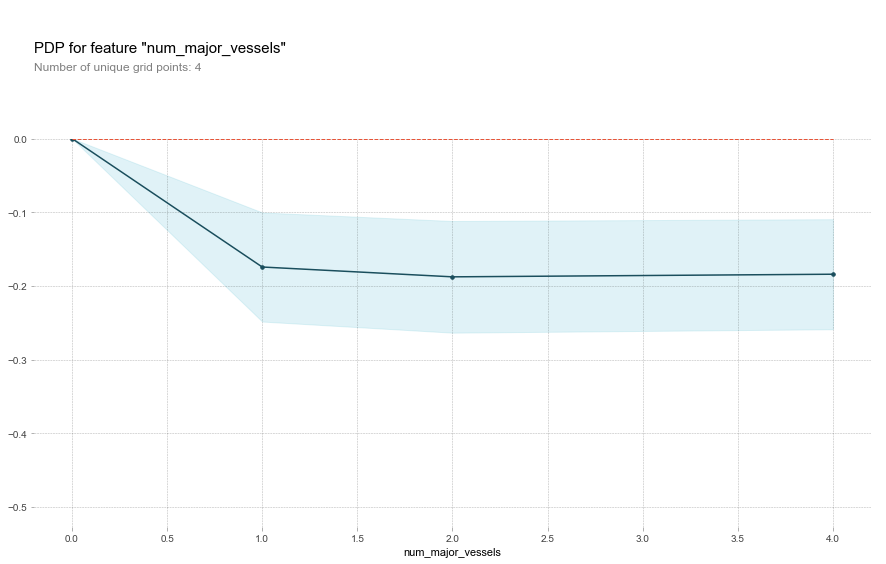

In [52]:
#put all model features in a list.
base_features = heart_df.columns.values.tolist()
base_features.remove('target')

#features we're trying to analyze
feat_name = 'num_major_vessels'

#pdp_isolate to see the isolated impact of the features.
pdp_dist = pdp.pdp_isolate(model=rf_random, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Okay, this one makes sense, the more major vessels a person has, the less is the probability of having heart disease.

## Conclusion
Unfortunately, the dataset is too small for us to build a good predictor, sometimes the results are counterintuitive, however, we were able to create a good model, at least one with good accuracy numbers for the test dataframe that we have. 

Initially I thought some features like high cholesterol and male would stand out, however, I was surprised to see that other features play a more important role. Maybe I don't know much about heart disease after all, but it was a really exciting project. The use of machine learning in health care is something that amazes me and I think we'll be using more and more now that we the value of data.